# Implementation of Linear Regrassion

In [1]:
import numpy as np
import pandas as pd

In [2]:
def init_weights(features):
    
    w = np.random.random((features,1))
    return (w)


In [3]:
def regression_training(X, Y, l_rate=0.01,epochs=1000,batch_size=1):
    
    '''
        X: ndim numpy array represents X data
        Y: numpy array represents Y data or labels
        l_rate: float range(0-1) represents learning rate of the model
        epochs: int represents number of maximum iteration
        batch_size: int represents size of batch for mini-batch gradient decent
    '''
    '''
    check if batch_size is correct
    '''
    if batch_size != 1:
        assert X.shape[0] % batch_size == 0, "not proper batch size "  
    
    '''
    add extra column for bias term
    '''
    C = pd.DataFrame(data=np.ones((X.shape[0],1)),columns=['1'])
    X = pd.concat([C,X],axis=1)
    rows, cols = X.shape
    '''
    Initialize weights
    '''
    w = init_weights(cols)
    error_rill = []
    previous_error = 0
    count = 0
    for _ in range(epochs):
        start = 0
        error = []
        for i in range(rows//batch_size):
            e = 0
            Y_hat = X[start:start+batch_size].dot(w)
            e = round(
                float(1/2 * np.mean(
                    np.subtract(Y_hat,Y[start:start+batch_size])**2)),5)
            grad = 1/batch_size * (X[start:start+batch_size].T).dot(np.subtract(Y_hat,Y[start:start+batch_size]))
            error.append(e)
            error_rill.append(e)
            w = np.subtract(w,l_rate*grad)
            start += batch_size
        e = round(sum(error)/len(error),5)
        if previous_error == e:
            count += 1
        else:
            count = 0
        if count == 10:
            break
        previous_error = e
    return w,error_rill
        
    

In [4]:
def test(W,X):
    X = X.copy()
    X['1'] = 1
    return(X.dot(W))

In [5]:
from sklearn.datasets import load_boston
data = load_boston()

In [6]:
X = pd.DataFrame(data=data.data,columns=data.feature_names)
Y = pd.DataFrame(data=data.target,columns=['label'])
X = (X - X.mean())/X.std()

In [7]:
w1,error1 = regression_training(X,Y,batch_size=X.shape[0],epochs=10000)
w2,error2 = regression_training(X[:500],Y[:500],batch_size=100,epochs=10000)

In [8]:
import matplotlib.pyplot as plt

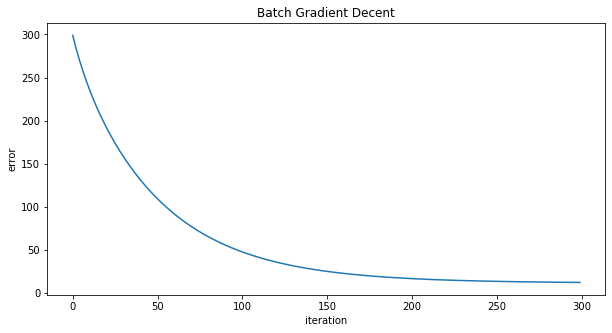

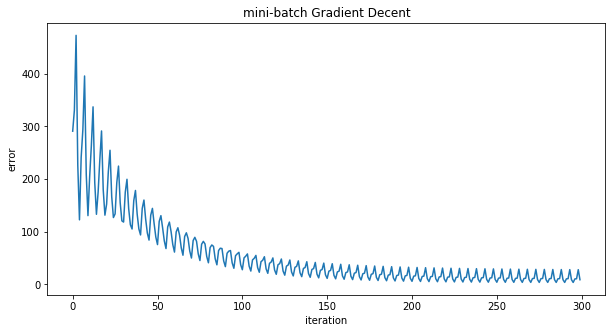

In [9]:
plt.figure(figsize=(10,5))
plt.plot(error1[:300])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Batch Gradient Decent")
plt.figure(figsize=(10,5))
plt.plot(error2[:300:])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("mini-batch Gradient Decent")
plt.show()

# THE END